- 농구화 제외한 나머지 파일들을 함수를 이용해 워드클라우드로 만들 것이다

In [30]:
from wordcloud import WordCloud # 워드클라우드 제작 라이브러리
import pandas as pd # 데이터 프레임 라이브러리
import numpy as np # 행렬 라이브러리
import matplotlib.pyplot as plt # 워드클라우드 시각화 라이브러리

In [37]:
df_basketball=pd.read_csv("../crawling/basketball_reviews_final.csv",encoding='utf-8-sig')
df_gym=pd.read_csv("../crawling/gym_reviews_final.csv",encoding='utf-8-sig')
df_jordan=pd.read_csv("../crawling/jordan_reviews_final.csv",encoding='utf-8-sig')
df_running=pd.read_csv("../crawling/running_reviews_final.csv",encoding='utf-8-sig')
df_soccer=pd.read_csv("../crawling/soccer_reviews_final.csv",encoding='utf-8-sig')

In [32]:
def csv_wordcloud(name, df):
    # 리뷰 합치기
    cols=[]
    for i in range(df.shape[1]-2):
        cols.append(f'Review {i+1}')

    df['review_combined'] =df[cols].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
    df['review_combined']
    
    # Kkma 사용
    import konlpy
    kkma = konlpy.tag.Kkma() #형태소 분석기 꼬꼬마(Kkma)

    nouns = df['review_combined'].apply(kkma.nouns)

    
    nouns = nouns.explode()

    df_word = pd.DataFrame({'word' : nouns})
    df_word['count'] = df_word['word'].str.len()
    df_word = df_word.query('count >= 2') # 글자수 2개 이상 가져오기
    
    df_word=df_word.groupby('word',as_index=False).count().sort_values('count', ascending = False)

    dic_word = df_word.set_index('word').to_dict()['count']
    dic_word
    
    wc = WordCloud(random_state = 123, font_path = 'AppleGothic', width = 400,
                height = 400, background_color = 'white')

    img_wordcloud = wc.generate_from_frequencies(dic_word)

    plt.figure(figsize = (7, 7))
    plt.axis('off')
    plt.imshow(img_wordcloud)
    plt.savefig(f'{name}_wordcloud.png')

In [38]:
df_list=[
    ("basketball",df_basketball),
    ("gym",df_gym),
    ("jordan",df_jordan),
    ("running",df_running),
    ("soccer",df_soccer),
]

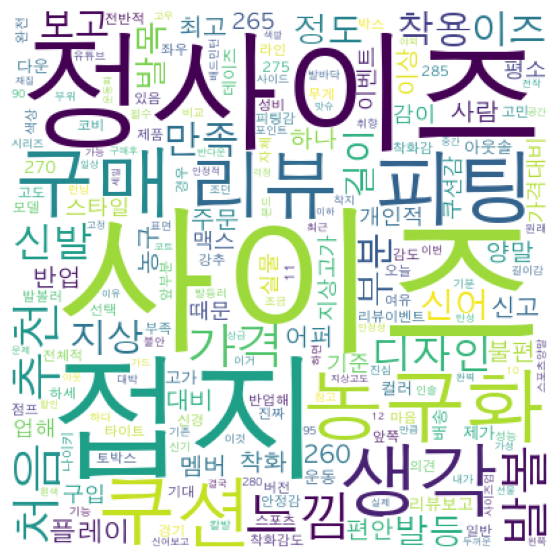

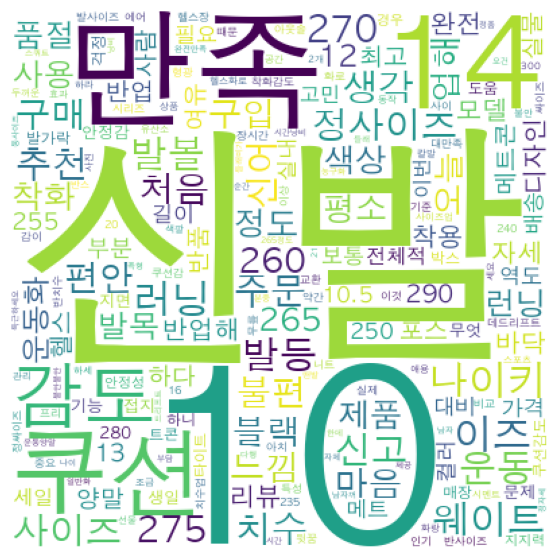

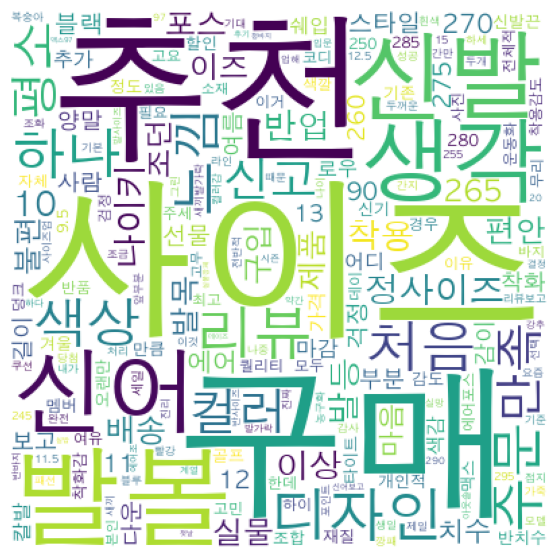

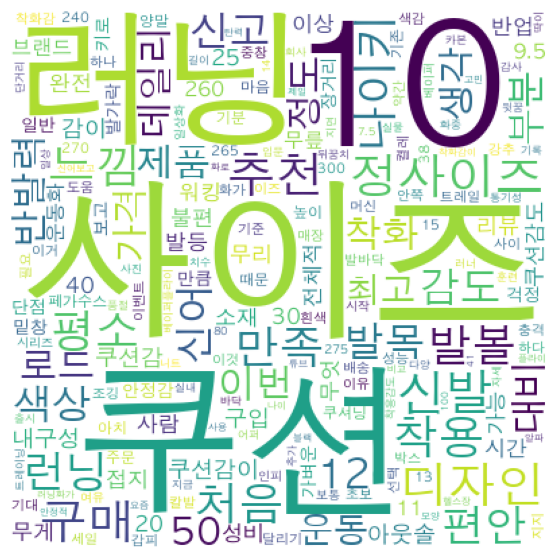

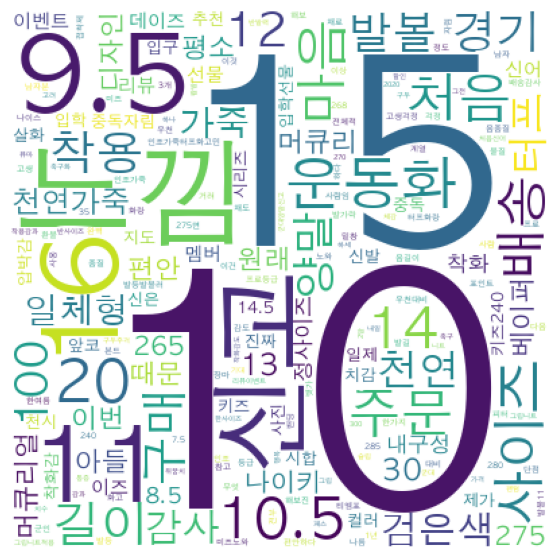

In [39]:
for name,i in df_list:
    csv_wordcloud(name,i)